In [1]:
import saspy
sas = saspy.SASsession()

Using SAS Config named: oda
SAS Connection established. Subprocess id is 19152



### ppt

c:\Users\yzdom\AppData\Local\Programs\Python\Python312\Lib\site-packages\saspy\sasioiom.py:1056: UserWarning: Noticed 'ERROR:' in LOG, you ought to take a look and see if there was a problem
  warnings.warn("Noticed 'ERROR:' in LOG, you ought to take a look and see if there was a problem")



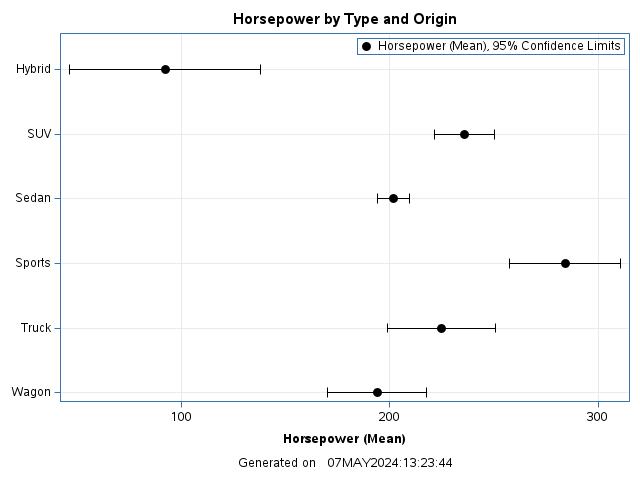

In [3]:
sas.submitLST(f"""
ods graphics on / border=off;
filename _dataout "&_SASWSTEMP_/SGPlot.pptx";

ods powerpoint file=_dataout;
title 'PROC SGRENDER';
/* datetime footnote */
footnote "Generated on %sysfunc(datetime(),datetime20.)";

title 'Horsepower by Type and Origin';
proc sgplot data=sashelp.cars;
  dot type / response=horsepower limits=both stat=mean
      markerattrs=(symbol=circlefilled size=9);
  xaxis grid;
  yaxis display=(nolabel) offsetmin=0.1;
  keylegend / location=inside position=topright across=1;
  run;

ods powerpoint close;

%let _DATAOUT_MIME_TYPE=application/vnd.openxmlformats-officedocument.presentationml.presentation;
%let _DATAOUT_NAME=sgplot.pptx;


run;
""")